In this exam option you will use <tt>scipy.integrate.odeint</tt> to simulate the motion of a ballistic projectile, that is, an object that moves under the influence of gravity alone. Then you will use your simulation in conjunction with <tt>scipy.optimize.minimize</tt> in order to find the initial velocity (speed and direction) that will cause your projectile to hit a desired target with minimum initial kinetic energy (speed).

The equations of motion of a ballistic projectile are: <br>
$\frac{d^2x}{dt} = 0$ <br>
$\frac{d^2y}{dt} = -g$ <br>
where $x$ is the horizontal position, $y$ is the vertical position, and $g = 9.81$ m/s is the acceleration due to gravity.

Your simulation is subject to the initial conditions: <br>
$x(t=0) = 0$ <br>
$y(t=0) = 0$ <br>
$\frac{dx}{dt}(t=0) = v_x $ <br>
$\frac{dy}{dt}(t=0) = v_y $ <br>
where $v_x$ and $v_y$ are the horizontal and vertical (respectively) components of the initial velocity.


1) The first step is the convert this system of two second-order (involving second time derivatives) equations into a system of four first-order (involving only first time derivatives) equations. I'll even suggest what this system should look like: you want equations of the form $\frac{dz_i}{dt} = f(z)$, where $z = [x,\dot{x},y,\dot{y}]$. While I suggest you write this out on paper, you don't have to turn it in. If you choose this exam option, I'm hoping you get beyond this first part, and I'll know you did it based on the rest of the assignment. 

2) Write a Python function <tt>f(z,t)</tt> that represents your system of first-order ordinary differential equations.

In [50]:
import numpy as np
def f(z,t):
    dz = np.zeros(len(z))
    dz[0] = z[1]
    dz[1] = 0
    dz[2] = z[3]
    dz[3] = -9.81
    return dz


3) Solve this equation from $t = 0$s to $t = 2$s using <tt>odeint</tt> assuming $v_x = v_y = 10$m/s. Plot the solution $y(t)$ (vertical axis) against $x(t)$ (horizontal axis) using <tt>matplotlib</tt>.  Use a fine enough array of time points in the simulation to get a smooth plot.

In [51]:
import scipy.integrate as sci
import numpy as np
t = np.linspace(0,2,500)
z = sci.odeint(f, y0 = [0,10,0,10], t=t)
print z

[[  0.          10.           0.          10.        ]
 [  0.04008016  10.           0.04000137   9.96068136]
 [  0.08016032  10.           0.07984514   9.92136273]
 ..., 
 [ 19.91983968  10.           0.45679905  -9.54136273]
 [ 19.95991984  10.           0.41847832  -9.58068136]
 [ 20.          10.           0.38        -9.62      ]]


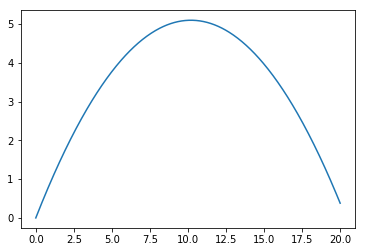

In [52]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(z[:,0], z[:,2])

This is a plot of the trajectory of the ballistic projectile, as though it left a trail of smoke behind it as it flew. You should see an upside-down parabola rising from (0,0) to about (10,5) and then falling back to (20,0).

4) Write a function <tt>ballisticSim(z0, tf)</tt> that accepts an initial condition <tt>z0</tt> and final time <tt>tf</tt> and returns the horizontal and vertical components of the trajectory $x(t)$ and $y(t)$ (as separate 1D arrays). Use the same number of time points as in the last part. Call this function to run the same simulation as before, then plot the resulting trajectory. (All you're doing is converting some of your last cell into a function.) 

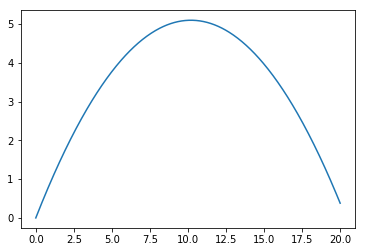

In [53]:
def ballisticSim(z0, tf):
    t = np.linspace(0,tf,500)
    z = sci.odeint(f, y0 = z0, t=t) 
    return z[:,0], z[:,2]
x,y = ballisticSim([0,10,0,10], 2)
plt.plot(x, y)

Your plot should look the same as before; all you've done is written a function that will make your code a little more readable. (You should probably also try changing the inputs to make sure that this causes the plot to change! Use your intuitiion to determine whether the result seems right: if <tt>tf</tt> increases, the final $x$ coordinate should be higher, etc...)

5) Copy and past, then tweak your function <tt>ballisticSim</tt> to accept three arguments instead of two:
<ol>
<li><tt>th</tt> (representing $\theta$), the initial angle of the projectile's velocity with respect to horizontal, specified in radians;</li>
<li><tt>v0</tt> (representing $v_0$), the initial speed of the projectile; and</li>
<li><tt>tf</tt>, the final time of simulation (as before).
</ol><br>
The only change you need to make inside the function, besides the argument list, is to determine the initial condition (<tt>z0</tt>) based on the initial angle and initial speed. This is just a bit of trigonometry: $v_x = v_0 \cos(\theta)$ and $v_y = v_0 \sin(\theta)$. The initial position is still $x = 0$, $y= 0$.

Test your function and plot the result of the simulation for $v_0 = 10 \sqrt(2)$ and $\theta = \pi/4$. This plot should still look the same as before.  (Again try changing the inputs to make sure that this causes the plot to change appropriately. If you increase the initial speed, the projectile should go further, etc....)

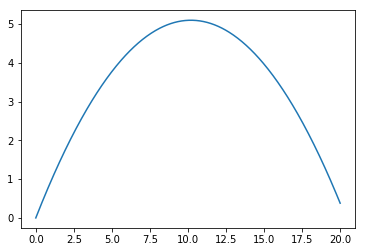

In [54]:
def ballisticSim(th, v0, tf):
    t = np.linspace(0,tf,500)
    Vx = v0*np.cos(th)
    Vy = v0*np.sin(th)
    z0 = [0,Vx,0,Vy]
    z = sci.odeint(f, y0 = z0, t=t) 
    return z[:,0], z[:,2]
x,y = ballisticSim(np.pi/4.0, 10*np.sqrt(2), 2)
plt.plot(x,y)

6) Write a function <tt>ballisticError(w, target)</tt> that accepts:
<ol>
<li>a list-like object (list, 1D Numpy array, etc...) <tt>w</tt> containing your three decision variables (<tt>th</tt>, <tt>v0</tt>, and <tt>tf</tt>) and</li>
<li>a list-like object <tt>target</tt> containing the x and y coordinates of the point you want to hit</li>
</ol>
and returns <tt>err</tt>, a list-like object composed of <tt>dx</tt> and <tt>dy</tt>, the horizontal and vertical distances between the projectile at time <tt>tf</tt> and the point you wanted to hit <tt>target</tt>. 

Since you already have <tt>ballisticSim</tt>, this doesn't take much code to write. You just need to unpack the input <tt>w</tt>, use the values it contains to run <tt>ballisticSim</tt>, and return the differences between the last of the resulting <tt>x</tt> and <tt>y</tt> coordinates and your target coordinates.

The reason we're writing this function is that we will use it to find the values of decision variables <tt>th</tt>, <tt>v0</tt>, and <tt>tf</tt> that cause the projectile to hit the target. In future parts, <tt>minimize</tt> is going to start with your initial guess of the decision variables, evaluate <tt>ballisticError(w, target)</tt> with them, and iteratively tweak the values of the decision variables until the components of the <tt>err</tt> are both zero, indicating that the target is hit.  It will then include these values in the object it returns.

<i>Technical note: you might argue that $t_f$ should not be needed in order to determine whether the projectile will hit the target. This is true, but it is much easier to write a constraint function that requires the projectile to be at the target location at the </i>end<i> of simulation than at some undetermined time of a simulation of some unspecified duration. You're welcome to try your luck without $t_f$ as a decision variable, but I don't recommend it.</i>

Test <tt>ballisticError</tt> with <tt>w</tt> containing the values of the decision variables you've used in previous simulations and make the target the point (20,0). <tt>ballisticError</tt> should tell you that there is zero (or very, very small) error in the horizontal direction and about $0.38$m error in the vertical direction.

In [55]:
def ballisticsError(w, target):
    x, y = ballisticSim(*w)
    dx = x[-1] - target[0]
    dy = y[-1] - target[1]
    return dx,dy

ballisticsError([np.pi/4.0, 10*np.sqrt(2), 2], (20,0))

(0.0, 0.37999999999763645)

7) (Optional) Write a lambda function <tt>constraint(w)</tt> that executes <tt>ballisticError(w,target)</tt> and returns whatever <tt>ballisticError</tt> returns. This is basically just a wrapper function that eliminates the need for <tt>minimize</tt> to pass an additional argument <tt>target</tt> to <tt>ballisticError</tt>. (If it doesn't make sense now, perhaps it will in two more steps. If you prefer, you can get around this step if you use the optional argument to <tt>minimize</tt> called <tt>args</tt>.)

In [60]:
target = (20,0)
constraint = lambda w: ballisticsError(w, target)
constraint([np.pi/4.0, 10*np.sqrt(2), 2])

(0.0, 0.37999999999763645)

8) Considering we are trying to minimize the initial speed required to hit the target, write an appropriate objective function <tt>objective(w)</tt>. It's a one-liner.

In [57]:
def objective(w):
    return w[1]

9) Using guess for the decision variables <tt>w0 = [0.1,1,1]</tt>, use <tt>minimize</tt> to find the solution to our problem. Again, <tt>minimize</tt> will take your guess <tt>w0</tt> as the initial value of <tt>w</tt> and iteratively refine the values inside in order to minimize <tt>objective</tt> while satisifying <tt>constraint</tt>. Print the results returned by <tt>minimize</tt>. The optimization should have terminated successfully.

In [63]:
import scipy.optimize as sciop
res = sciop.minimize(objective, x0 = [0.1,1,1], constraints = {"type":"eq", "fun" :constraint})
print res

     fun: 14.00714089451097
     jac: array([ 0.,  1.,  0.])
 message: 'Optimization terminated successfully.'
    nfev: 60
     nit: 12
    njev: 12
  status: 0
 success: True
       x: array([  0.78538144,  14.00714089,   2.01924134])


  status: 0
 success: True
    njev: 12
    nfev: 60
     fun: 14.007140894258344
       x: array([  0.78538146,  14.00714089,   2.01924136])
 message: 'Optimization terminated successfully.'
     jac: array([ 0.,  1.,  0.,  0.])
     nit: 12


10) Unpack the result returned by <tt>minimize</tt> and run <tt>ballisticSim</tt> with the values of the decision variables that cause the projectile to hit the target (with minimimum initial speed). Show a plot. It should look similar to the previous plots, except that now the projectile actually ends at (20, 0) rather than above it.

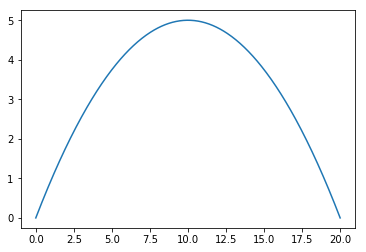

In [64]:
x,y = ballisticSim(*res.x)
plt.plot(x,y)

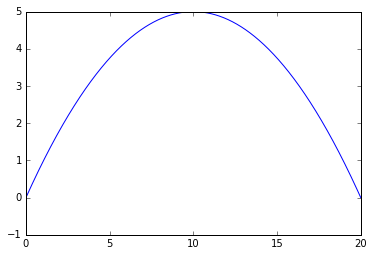

11) Show me that you really understand what's going on by adding a constraint that prevents the vertical position of the projectile from exeeding 4m. Show that the minimizer (usually) converges to the solution when the guess consists of random variables between 0 and 1. You might need to (determine) and add bounds for the decision variables to make this possible.

In [80]:
new_constr = lambda w: -1.0*(ballisticSim(*w)[1] - 4)
cons = ({"type":"eq", "fun" :constraint}, {"type": "ineq", "fun": new_constr})
res = sciop.minimize(objective, x0 = [0.1,1,1], bounds = [(0,1), (0,1), (0,1)], constraints = cons)
print res

     fun: 0.9999999999999977
     jac: array([ 0.        ,  1.00000001,  0.        ])
 message: 'Iteration limit exceeded'
    nfev: 1477
     nit: 101
    njev: 101
  status: 9
 success: False
       x: array([ 0.1,  1. ,  1. ])


  status: 0
 success: True
    njev: 43
    nfev: 243
     fun: 14.181145559719967
       x: array([  0.67474156,  14.18114556,   1.80609576])
 message: 'Optimization terminated successfully.'
     jac: array([ 0.,  1.,  0.,  0.])
     nit: 43


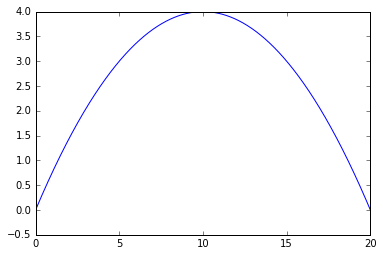